# Statistical hypotheses in R. Example 11
## Multiple comparisons test. Nominal data
**Task.** During the study of recurrent urinary tract infections in girls of age 3-16 years old the treatment efficacy for three antibacterial drugs was assesed. All patients were subject to the short treatment course with randomly administered drug. A year after the course repeat of urine culture was made for all of the patients. If bacteriuria was found during the test then relapse was ascertained. The results are below:

Drug|Relapse|Norm
-|-|-
Ampicillin|20|7
Trimethoprim|24|21
Cephalexin|28|4

Is there a reason to assume different drug efficacy? If yes, then which drug is the most efficient?


### 1.	Define the type of the variable
Because the variables have only two possible values-categories (relaplse, norm) then we're dealing with the nominal data.

**Get data in R**

In [1]:
Input = (
     "Drug,Ampicillin, Trimethoprim, Cephalexin
     Relapse,20, 24, 28
     Norm, 7, 21, 4"
)
# Note the square brackets encasing the CSV-reader below. 
# This will allow to store the results in the variable and show them on screen
(Data = read.csv(textConnection(Input), header = TRUE, row.names = 1))

,Ampicillin,Trimethoprim,Cephalexin
Relapse,20,24,28
Norm,7,21,4


### 2. Formulate the statistical hypotheses

**Null hypothesis (H0):** Relapse rates for all three drugs are the same

**Alternative hypothesis (H1):** Relapse rates for all three drugs are different

### 3. Testing the hypotheses
To get the multiple comparisons in nominal data one has to use either `prop.test` or `chisq.test` function. Both functions use the same method Chi-square and expect the data to be provided as a matrix with 2-columns (number of successess and failures). It means we have to convert our variable into matrix with `as.matrix` function and transpose it with `t` function to get the groups as rows and categories as columns.

In [2]:
prop.test(as.matrix(t(Data)))


	3-sample test for equality of proportions without continuity
	correction

data:  as.matrix(t(Data))
X-squared = 10.65, df = 2, p-value = 0.004868
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3 
0.7407407 0.5333333 0.8750000 


The result of the test shows that we have to reject the null hypothesis (`p-value` < 0.05) and accept the alternative hypothesis.

It means that relapse rates for all three drugs are different.

We'll try to figure out which drug has different efficiency. To do so we have to perform the pairwise tests for all supplements. To do so we'll use the `pairwise.prop.test` function which also expects data to be provided as a matrix with 2-columns.

To get rid of possible errors in the resulting `p-value` we'll have to specify the p-value correction method along with the tested data. We'll use the Bonferroni correction method (for the details one can address this [book](http://www.biostathandbook.com/multiplecomparisons.html)).

In [3]:
pairwise.prop.test(as.matrix(t(Data)), p.adjust.method = "bonferroni")


	Pairwise comparisons using Pairwise comparison of proportions 

data:  as.matrix(t(Data)) 

             Ampicillin Trimethoprim
Trimethoprim 0.402      -           
Cephalexin   0.976      0.011       

P value adjustment method: bonferroni 

The result of the function is presented as a matrix of `p-values` calculated for each of the group pair. As one can derive from the table no pairwise test gives us idea of which drug contribute most to the differences among their efficacy. We can theoretize on which drug is the most efficient by plotting the proportions of all three. To make a barplot we'll use the `barplot` function with the proportions table as an argument.

,Ampicillin,Trimethoprim,Cephalexin
Relapse,0.7407407,0.5333333,0.875
Norm,0.2592593,0.4666667,0.125


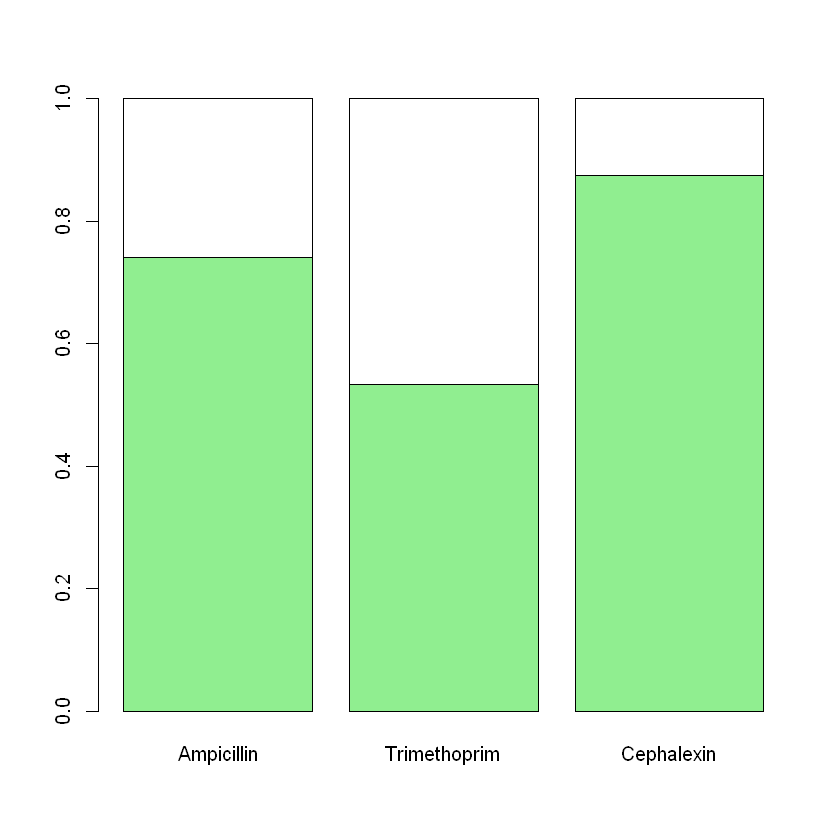

In [4]:
# Get the proportions for each outcome of each drug
(Data.props = prop.table(as.matrix(Data), margin = 2))
barplot(Data.props, col = c("light green", "white"))

From the table above and the plot one can easily find Trimethoprim being the most effective drug, because it has the lowest relapse proportion rate.

### Conclusion
Relapse rates for all three drugs are different. Based on the relapse proportion rates Trimethoprim is believed to be the best of all three considered drugs.